In [3]:
# Import Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2
%matplotlib inline
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)


In [4]:
from data_config import DB_NAME, DB_USER, DB_PASS, DB_HOST, DB_PORT
conn = psycopg2.connect(database=DB_NAME,
                        user=DB_USER,
                        password=DB_PASS,
                        host=DB_HOST,
                        port=DB_PORT)
print("Database connected successfully")

Database connected successfully


In [5]:
cur = conn.cursor()
# Fetch the column names of the table
cur.execute("SELECT column_name FROM information_schema.columns WHERE table_name ='employee'")
rows = cur.fetchall()
column_names = [row[0] for row in rows]
print(column_names)
print('column names fetched successfully')


['age', 'employee_count', 'employee_number', 'hourly_rate', 'job_level', 'monthly_income', 'monthly_rate', 'num_companies_worked', 'percent_salary_hike', 'standard_hours', 'stock_option_level', 'total_working_years', 'training_times_last_year', 'years_at_company', 'years_in_current_role', 'years_since_last_promotion', 'years_with_curr_manager', 'daily_rate', 'distance_from_home', 'attrition', 'business_travel', 'marital_status', 'department', 'work_life_balance', 'education', 'education_field', 'performance_rating', 'relationship_satisfaction', 'environment_satisfaction', 'gender', 'over_18', 'job_involvement', 'over_time', 'job_role', 'job_satisfaction']
column names fetched successfully


## Question 1
### Check for the employee with a Doctorate degree with an age less than 40


In [6]:
# query="SELECT * FROM employee WHERE Age > 40 AND Education = 'Doctor';"

cur = conn.cursor()
cur.execute("SELECT * FROM employee WHERE Age > 40 AND Education = 'Doctor'")
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =column_names)
print(employee_df)



    age employee_count    employee_number  hourly_rate  \
0    44             No      Travel_Rarely         1488   
1    47             No      Travel_Rarely         1482   
2    42             No      Travel_Rarely          810   
3    48             No      Travel_Rarely          163   
4    55             No      Travel_Rarely         1117   
5    41             No      Travel_Rarely         1276   
6    43             No  Travel_Frequently         1001   
7    42             No         Non-Travel          179   
8    42             No  Travel_Frequently          458   
9    41             No      Travel_Rarely         1283   
10   44             No  Travel_Frequently          383   
11   50             No  Travel_Frequently          333   
12   53            Yes      Travel_Rarely          607   
13   55             No      Travel_Rarely          685   
14   50             No  Travel_Frequently         1234   
15   45             No      Travel_Rarely         1015   
16   44       

## Question 2
### What is the count of employees by gender?


In [7]:
cur = conn.cursor()
cur.execute('SELECT Gender,COUNT(*) AS gender_count FROM employee GROUP BY Gender ORDER BY gender_count DESC;')
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['gender','gender_count'])
print(employee_df)



   gender  gender_count
0    Male           882
1  Female           588


## Question 3
### How is the distribution of employee education across different departments?


In [8]:
cur = conn.cursor()
cur.execute('SELECT Department, Education, COUNT(*) AS Count_of_Employees FROM employee GROUP BY Department,Education ORDER BY Department, Education DESC;')
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['department','education','employee_count'])
print(employee_df)


                department      education  employee_count
0          Human Resources         Master              15
1          Human Resources         Doctor               3
2          Human Resources        College              13
3          Human Resources  Below College               5
4          Human Resources       Bachelor              27
5   Research & Development         Master             255
6   Research & Development         Doctor              30
7   Research & Development        College             182
8   Research & Development  Below College             115
9   Research & Development       Bachelor             379
10                   Sales         Master             128
11                   Sales         Doctor              15
12                   Sales        College              87
13                   Sales  Below College              50
14                   Sales       Bachelor             166


## Question 4
### What is the distribution of employee performance ratings across different departments?


In [9]:
cur = conn.cursor()
cur.execute('SELECT Department,Performance_Rating,COUNT(*) AS Count_of_employees FROM employee GROUP BY Department,Performance_Rating ORDER BY Department, Count_of_employees DESC;')
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['department','performance_rating','employee_count'])
print(employee_df)


               department performance_rating  employee_count
0         Human Resources          Satisfied              54
1         Human Resources   Highly-Satisfied               9
2  Research & Development          Satisfied             805
3  Research & Development   Highly-Satisfied             156
4                   Sales          Satisfied             385
5                   Sales   Highly-Satisfied              61


## Question 5
### What is the average monthly rate and income for each job role?

In [10]:
cur = conn.cursor()
cur.execute('SELECT Job_Role, ROUND(AVG(Monthly_Rate), 2) AS avg_monthly_rate, ROUND(AVG(Monthly_income), 2) AS avg_monthly_income FROM employee GROUP BY Job_Role ORDER BY avg_monthly_income DESC;')
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['job_role','avg_monthly_rate','avg_monthly_income'])
print(employee_df)


                    job_role avg_monthly_rate avg_monthly_income
0                    Manager         15139.58           17181.68
1          Research Director         15080.55           16033.55
2  Healthcare Representative         14400.20            7528.76
3     Manufacturing Director         14478.97            7295.14
4            Sales Executive         14471.11            6924.28
5            Human Resources         13292.40            4235.75
6         Research Scientist         13927.11            3239.97
7      Laboratory Technician         14066.06            3237.17
8       Sales Representative         14278.20            2626.00


## Question 6
### What is the average monthly rate and income for each job role in each department?

In [11]:
cur = conn.cursor()
cur.execute('SELECT Department,Job_Role,ROUND(AVG(Monthly_Rate), 2) AS avg_monthly_rate,ROUND(AVG(Monthly_income), 2) AS avg_monthly_income FROM employee GROUP BY Department, Job_Role ORDER BY Department, avg_monthly_income DESC;')
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['department','job_role','avg_monthly_rate','avg_monthly_income'])
print(employee_df)


                department                   job_role avg_monthly_rate  \
0          Human Resources                    Manager         14441.18   
1          Human Resources            Human Resources         13292.40   
2   Research & Development                    Manager         15289.06   
3   Research & Development          Research Director         15080.55   
4   Research & Development  Healthcare Representative         14400.20   
5   Research & Development     Manufacturing Director         14478.97   
6   Research & Development         Research Scientist         13927.11   
7   Research & Development      Laboratory Technician         14066.06   
8                    Sales                    Manager         15129.05   
9                    Sales            Sales Executive         14471.11   
10                   Sales       Sales Representative         14278.20   

   avg_monthly_income  
0            18088.64  
1             4235.75  
2            17130.33  
3            16

## Question 7
### What is the distribution of employee attrition across different age ranges?

In [12]:
cur = conn.cursor()
cur.execute("SELECT CASE WHEN Age BETWEEN 18 AND 24 THEN '18-24' WHEN Age BETWEEN 25 AND 34 THEN '25-34' WHEN Age BETWEEN 35 AND 44 THEN '35-44' WHEN Age BETWEEN 45 AND 54 THEN '45-54'WHEN Age BETWEEN 55 AND 60 THEN '55-60'ELSE '60+'END AS age_range, Attrition,COUNT(*) AS count_of_employees FROM employee GROUP BY age_range, Attrition ORDER BY age_range;")
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['age_range','attrition','employee_count'])
print(employee_df)


  age_range attrition  employee_count
0     18-24        No              59
1     18-24       Yes              38
2     25-34        No             442
3     25-34       Yes             112
4     35-44        No             454
5     35-44       Yes              51
6     45-54       Yes              25
7     45-54        No             220
8     55-60        No              58
9     55-60       Yes              11


## Question 8
### Give Environment Satisfaction distribution to the employees.

In [13]:
cur = conn.cursor()
cur.execute("SELECT Environment_Satisfaction, COUNT(*) AS num_of_employees FROM employee GROUP BY Environment_Satisfaction ORDER BY Environment_Satisfaction IN('Medium','Satisfied', 'Highly Satisfied');")
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['environment_satisfaction','num_of_employees'])
print(employee_df)


  environment_satisfaction  num_of_employees
0                      Low               284
1         Highly Satisfied               446
2                Satisfied               453
3                   Medium               287


## Question 9
### Show the distribution of Job Satisfaction among the employees.

In [14]:
cur = conn.cursor()
cur.execute("SELECT Job_Satisfaction,COUNT(*) AS num_of_employees FROM employee GROUP BY Job_Satisfaction")
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['job_satisfaction','num_of_employees'])
print(employee_df)


   job_satisfaction  num_of_employees
0  Highly-Satisfied               459
1         Satisfied               442
2               Mid               280
3               Low               289


## Question 10
### Show the distribution of work-life balance among the employees.

In [15]:
cur = conn.cursor()
cur.execute("SELECT work_life_balance,COUNT(*) AS num_of_employees FROM employee GROUP BY work_life_balance")
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['work_life_balance','num_of_employees'])
print(employee_df)


  work_life_balance  num_of_employees
0         Very-Good               153
1              Good               893
2               Mid               344
3               Low                80


## Question 11
### Show the count of involved and highly-involved employees.


In [16]:
cur = conn.cursor()
cur.execute("SELECT job_involvement,COUNT(*) AS num_of_employees FROM employee where job_involvement in ('Highly-Involved','Involved') GROUP BY job_involvement")
rows = cur.fetchall()
employee_df = pd.DataFrame(rows, columns =['job_involvement','num_of_employees'])
print(employee_df)


   job_involvement  num_of_employees
0  Highly-Involved               144
1         Involved               868


## Data Visualization
### In this section, we will be developing some plots to get insights and make conclusion out of it. 

In [18]:
# loading data:
hr_data=pd.read_csv('Data.csv')
hr_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,College,Life Sciences,1,1,Medium,Female,94,Involved,2,Sales Executive,Highly-Satisfied,Single,5993,19479,8,Y,Yes,11,Satisfied,Low,80,0,8,0,Low,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,Below College,Life Sciences,1,2,Satisfied,Male,61,Medium,2,Research Scientist,Mid,Married,5130,24907,1,Y,No,23,Highly-Satisfied,Highly-Satisfied,80,1,10,3,Good,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,College,Other,1,4,Highly Satisfied,Male,92,Medium,1,Laboratory Technician,Satisfied,Single,2090,2396,6,Y,Yes,15,Satisfied,Medium,80,0,7,3,Good,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,Master,Life Sciences,1,5,Highly Satisfied,Female,56,Involved,1,Research Scientist,Satisfied,Married,2909,23159,1,Y,Yes,11,Satisfied,Satisfied,80,0,8,3,Good,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,Below College,Medical,1,7,Low,Male,40,Involved,1,Laboratory Technician,Mid,Married,3468,16632,9,Y,No,12,Satisfied,Highly-Satisfied,80,1,6,3,Good,2,2,2,2


# Attrition rate by Department

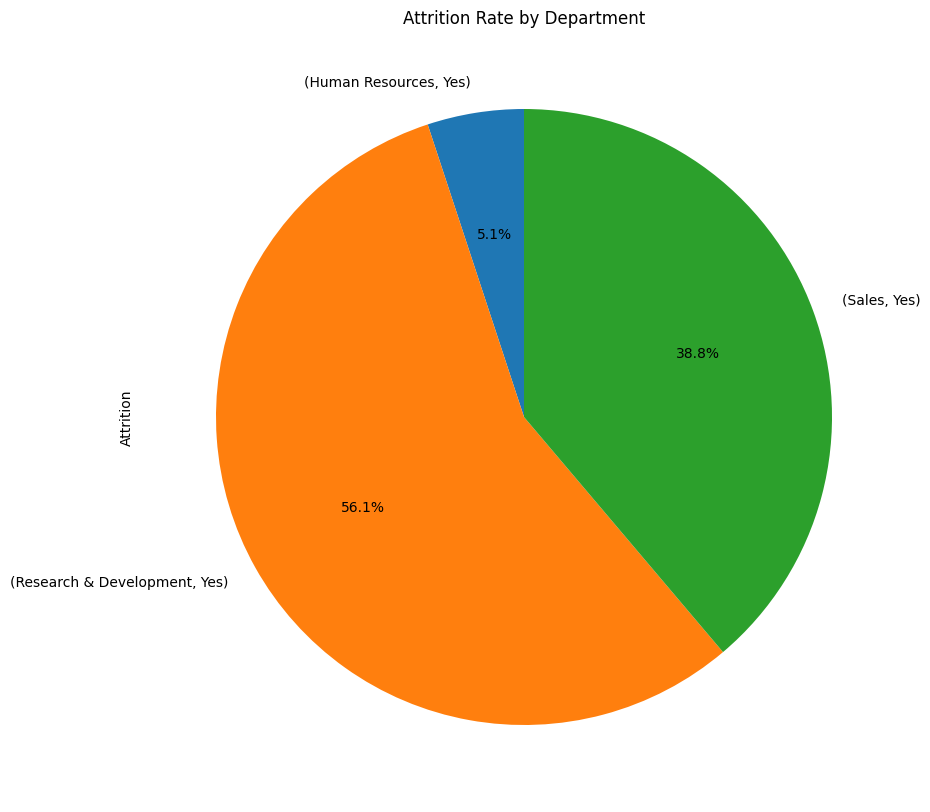

In [26]:
# filter the DataFrame to only include rows where Attrition is "Yes"
attrition_yes = hr_data[hr_data['Attrition'] == 'Yes']

# Calculate the attrition rate by department
attrition_by_dept = attrition_yes.groupby('Department')['Attrition'].value_counts()

# Create a pie chart of the attrition rates by department
fig, ax = plt.subplots(figsize=(10, 10))
attrition_by_dept.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)

# Add a title to the chart
plt.title('Attrition Rate by Department')

# Display the chart
plt.show()

# Attrition Rate by Overtime Requirement

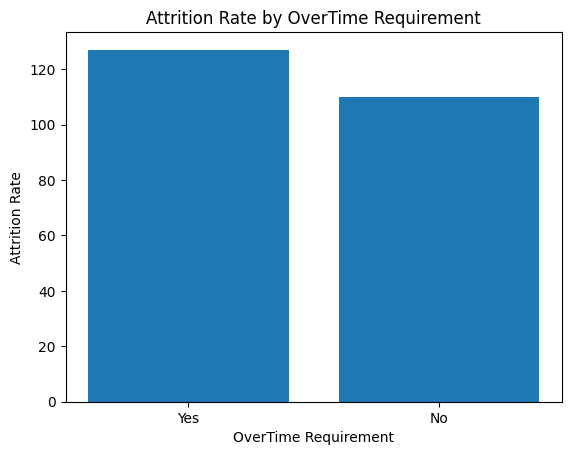

In [27]:
# filter the data to include only employees with Attrition == 'Yes'
df_attrition = hr_data[hr_data['Attrition'] == 'Yes']

# count the number of employees with Attrition == 'Yes' for each value of OverTime
df_overtime = df_attrition['OverTime'].value_counts()

# create a bar plot of attrition rate by overtime requirement
plt.bar(df_overtime.index, df_overtime.values)

# add labels and title to the plot
plt.xlabel('OverTime Requirement')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by OverTime Requirement')

# display the plot
plt.show()


# Attrition Rate by Job Role

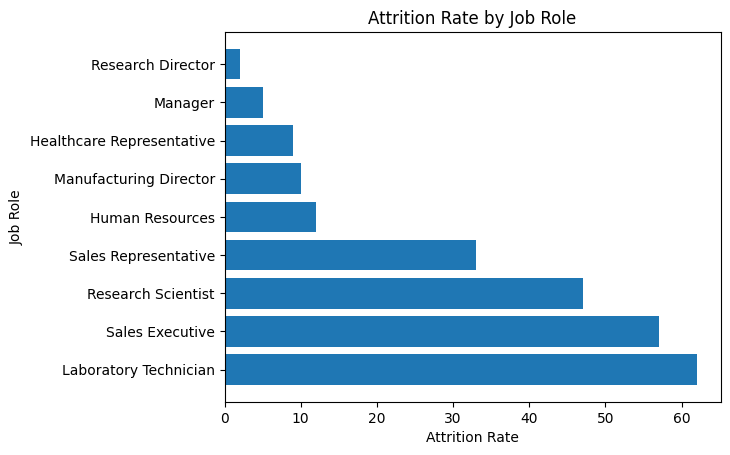

In [28]:
# filter the data to include only employees with Attrition == 'Yes'
df_attrition = hr_data[hr_data['Attrition'] == 'Yes']

# count the number of employees with Attrition == 'Yes' for each job role
df_jobrole = df_attrition['JobRole'].value_counts()

# create a horizontal bar graph of attrition rate by job role
plt.barh(df_jobrole.index, df_jobrole.values)

# add labels and title to the plot
plt.xlabel('Attrition Rate')
plt.ylabel('Job Role')
plt.title('Attrition Rate by Job Role')

# display the plot
plt.show()


# Attrition rate by Job Involvement Level

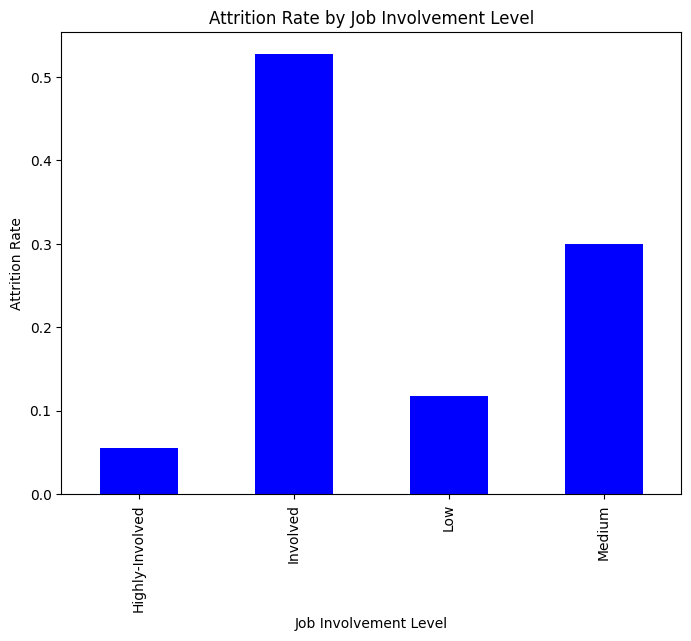

In [29]:
# Filter the dataframe to include only employees who have left the company
left_df = hr_data[hr_data['Attrition'] == 'Yes']

# Calculate the attrition rate by job involvement level
job_involvement_df = left_df.groupby('JobInvolvement').size() / len(left_df)

# Create a bar graph
job_involvement_df.plot(kind='bar', figsize=(8,6), color='blue')

# Set the title and axis labels
plt.title('Attrition Rate by Job Involvement Level')
plt.xlabel('Job Involvement Level')
plt.ylabel('Attrition Rate')

# Display the graph
plt.show()


## Number of Employees and Attrition Rate by Age

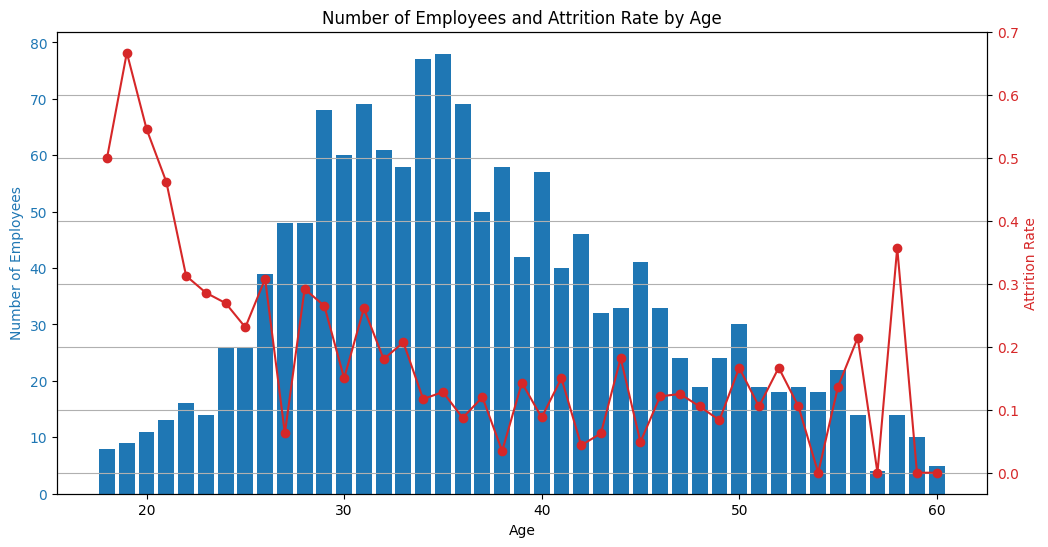

In [30]:
# Group the dataframe by age
age_groups = hr_data.groupby('Age')

# Calculate the number of employees and attrition rate for each age group
employee_count = age_groups.size()
attrition_rate = age_groups['Attrition'].apply(lambda x: sum(x == 'Yes') / len(x))

# Create a bar graph
fig, ax1 = plt.subplots(figsize=(12,6))

# Plot the number of employees as a bar graph
color = 'tab:blue'
ax1.set_xlabel('Age')
ax1.set_ylabel('Number of Employees', color=color)
ax1.bar(employee_count.index, employee_count.values, color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for the attrition rate
ax2 = ax1.twinx()

# Plot the attrition rate as a line graph
color = 'tab:red'
ax2.set_ylabel('Attrition Rate', color=color)
ax2.plot(attrition_rate.index, attrition_rate.values, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Set the title and axis labels
plt.title('Number of Employees and Attrition Rate by Age')
plt.xlabel('Age')
plt.grid(axis='y')

# Display the graph
plt.show()


## Attrition Rate by Gender

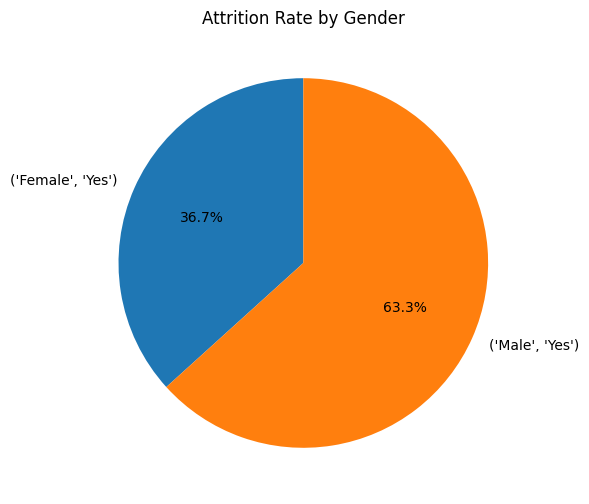

In [33]:
# Filter the dataframe to include only employees who have left the company
left_df = hr_data[hr_data['Attrition'] == 'Yes']
# Calculate the number of employees and attrition rate by gender
gender_counts = left_df.groupby('Gender')['Attrition'].count()
gender_attrition_counts = left_df.groupby(['Gender', 'Attrition']).size()

# Create the pie chart
fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(gender_attrition_counts, labels=gender_attrition_counts.index, autopct='%1.1f%%', startangle=90)
ax.set_title('Attrition Rate by Gender')

# Display the plot
plt.show()


## Attrition Rate By Marital Status

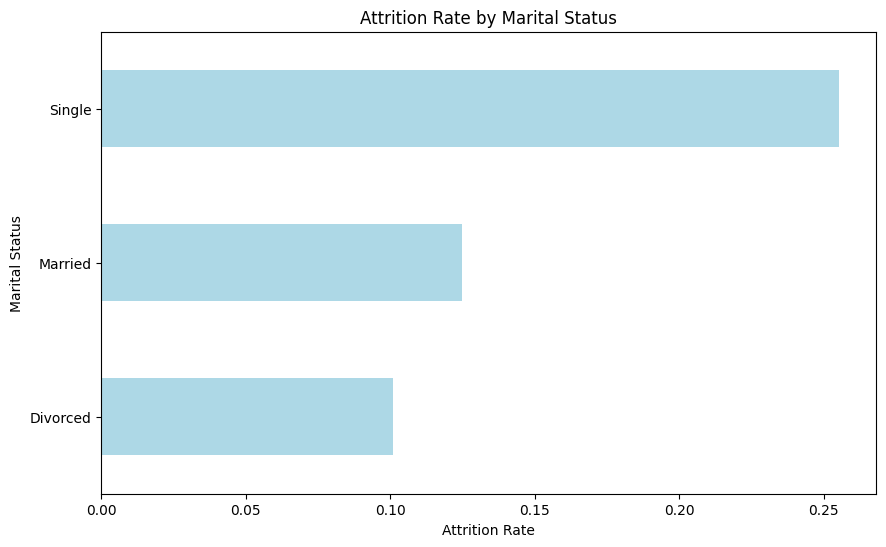

In [34]:
# group the data by marital status and attrition
grouped_data = hr_data.groupby(['MaritalStatus', 'Attrition']).size().unstack()

# calculate the attrition rate for each marital status
grouped_data['AttritionRate'] = grouped_data['Yes'] / (grouped_data['Yes'] + grouped_data['No'])

# create the horizontal bar graph
ax = grouped_data['AttritionRate'].plot(kind='barh', figsize=(10,6), color='lightblue')
ax.set_xlabel('Attrition Rate')
ax.set_ylabel('Marital Status')
ax.set_title('Attrition Rate by Marital Status')

# display the plot
plt.show()


## Attrition Rate by Job Satisfaction Level

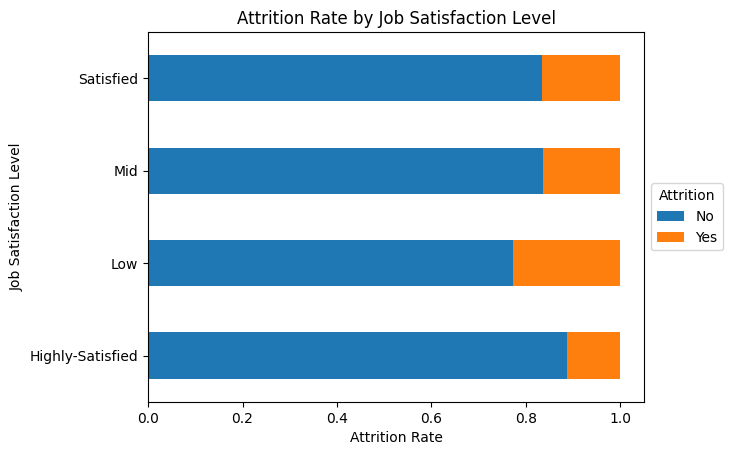

In [38]:
job_satisfaction_group = hr_data.groupby('JobSatisfaction')['Attrition'].value_counts(normalize=True).unstack()
job_satisfaction_group.plot(kind='barh', stacked=True)
plt.title('Attrition Rate by Job Satisfaction Level')
plt.xlabel('Attrition Rate')
plt.ylabel('Job Satisfaction Level')
plt.legend(title='Attrition', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


## Attrition Rate by Work-Life Balance

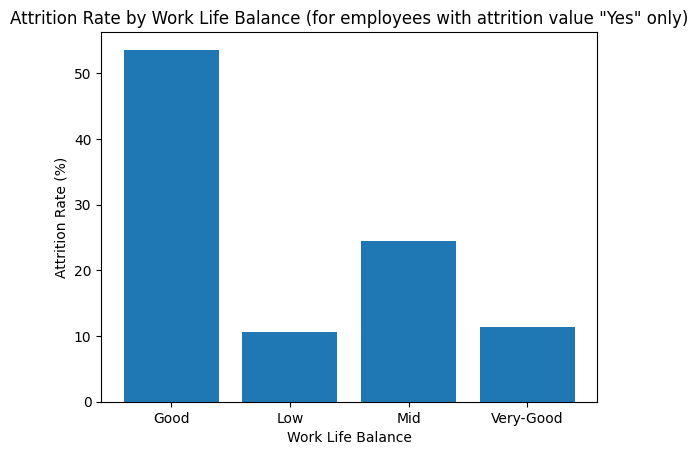

In [39]:

# filter the data for employees with attrition value "Yes"
data = hr_data[hr_data['Attrition'] == 'Yes']

# group the data by work life balance and calculate the attrition rate
attrition_rate = data.groupby('WorkLifeBalance')['Attrition'].count() / len(data) * 100

# create a bar plot
plt.bar(attrition_rate.index, attrition_rate.values)

# set chart title and axis labels
plt.title('Attrition Rate by Work Life Balance (for employees with attrition value "Yes" only)')
plt.xlabel('Work Life Balance')
plt.ylabel('Attrition Rate (%)')

# display the plot
plt.show()
